1. Import library

In [40]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.metrics import confusion_matrix
import pickle

2. Load dataset

In [12]:
df = pd.read_csv('../Dataset/updated_dataset_extract.csv')
df.head()

,Unnamed: 0,max_acc_re_raw,std_acc_re_raw,var_acc_re_raw,iqr_acc_re_raw,mad_acc_re_raw,max_acc_re_jerk,min_acc_re_jerk,range_acc_re_jerk,std_acc_re_jerk,...,iqr_gyro_re_raw,mad_gyro_re_raw,max_gyro_re_jerk,min_gyro_re_jerk,range_gyro_re_jerk,std_gyro_re_jerk,var_gyro_re_jerk,mad_gyro_re_jerk,fall_adl_bin,person_id
0,7,76.036896,10.008718,100.174436,5.566221,2.940210,39.913594,-36.025112,75.938706,6.746976,...,1.449972,0.698264,1.485122,-2.185508,3.670631,0.483618,0.233887,0.221804,1,P01
1,14,27.640774,5.992467,35.909656,10.007666,3.966184,11.271461,-14.967072,26.238534,3.753407,...,2.765061,1.205626,2.221515,-1.499693,3.721207,0.499416,0.249417,0.117655,1,P01
2,18,37.257846,6.346144,40.273544,9.312719,3.710783,19.888154,-8.400244,28.288399,3.218299,...,1.487817,0.834027,3.229411,-1.426427,4.655839,0.511617,0.261752,0.143988,1,P01
3,35,93.610890,10.095335,101.915796,7.518415,3.999902,75.824978,-69.053640,144.878618,12.108991,...,2.265150,1.091244,3.786974,-2.523516,6.310490,0.743834,0.553290,0.296161,1,P01
4,63,54.818089,9.130829,83.372032,4.909636,1.666575,19.117149,-27.576834,46.693983,5.637666,...,2.906405,0.877341,3.295670,-1.048350,4.344020,0.607688,0.369285,0.075793,1,P01


In [13]:
person_ids = df.pop('person_id').to_numpy()
y_train = df.pop('fall_adl_bin').to_numpy()
X_train = df.drop(df.columns[0], axis=1)
X_train.head()

,max_acc_re_raw,std_acc_re_raw,var_acc_re_raw,iqr_acc_re_raw,mad_acc_re_raw,max_acc_re_jerk,min_acc_re_jerk,range_acc_re_jerk,std_acc_re_jerk,var_acc_re_jerk,...,std_gyro_re_raw,var_gyro_re_raw,iqr_gyro_re_raw,mad_gyro_re_raw,max_gyro_re_jerk,min_gyro_re_jerk,range_gyro_re_jerk,std_gyro_re_jerk,var_gyro_re_jerk,mad_gyro_re_jerk
0,76.036896,10.008718,100.174436,5.566221,2.940210,39.913594,-36.025112,75.938706,6.746976,45.521692,...,0.958861,0.919414,1.449972,0.698264,1.485122,-2.185508,3.670631,0.483618,0.233887,0.221804
1,27.640774,5.992467,35.909656,10.007666,3.966184,11.271461,-14.967072,26.238534,3.753407,14.088064,...,1.529657,2.339850,2.765061,1.205626,2.221515,-1.499693,3.721207,0.499416,0.249417,0.117655
2,37.257846,6.346144,40.273544,9.312719,3.710783,19.888154,-8.400244,28.288399,3.218299,10.357448,...,1.398992,1.957177,1.487817,0.834027,3.229411,-1.426427,4.655839,0.511617,0.261752,0.143988
3,93.610890,10.095335,101.915796,7.518415,3.999902,75.824978,-69.053640,144.878618,12.108991,146.627661,...,1.353295,1.831407,2.265150,1.091244,3.786974,-2.523516,6.310490,0.743834,0.553290,0.296161
4,54.818089,9.130829,83.372032,4.909636,1.666575,19.117149,-27.576834,46.693983,5.637666,31.783275,...,1.631229,2.660907,2.906405,0.877341,3.295670,-1.048350,4.344020,0.607688,0.369285,0.075793


In [14]:
df.head()

,Unnamed: 0,max_acc_re_raw,std_acc_re_raw,var_acc_re_raw,iqr_acc_re_raw,mad_acc_re_raw,max_acc_re_jerk,min_acc_re_jerk,range_acc_re_jerk,std_acc_re_jerk,...,std_gyro_re_raw,var_gyro_re_raw,iqr_gyro_re_raw,mad_gyro_re_raw,max_gyro_re_jerk,min_gyro_re_jerk,range_gyro_re_jerk,std_gyro_re_jerk,var_gyro_re_jerk,mad_gyro_re_jerk
0,7,76.036896,10.008718,100.174436,5.566221,2.940210,39.913594,-36.025112,75.938706,6.746976,...,0.958861,0.919414,1.449972,0.698264,1.485122,-2.185508,3.670631,0.483618,0.233887,0.221804
1,14,27.640774,5.992467,35.909656,10.007666,3.966184,11.271461,-14.967072,26.238534,3.753407,...,1.529657,2.339850,2.765061,1.205626,2.221515,-1.499693,3.721207,0.499416,0.249417,0.117655
2,18,37.257846,6.346144,40.273544,9.312719,3.710783,19.888154,-8.400244,28.288399,3.218299,...,1.398992,1.957177,1.487817,0.834027,3.229411,-1.426427,4.655839,0.511617,0.261752,0.143988
3,35,93.610890,10.095335,101.915796,7.518415,3.999902,75.824978,-69.053640,144.878618,12.108991,...,1.353295,1.831407,2.265150,1.091244,3.786974,-2.523516,6.310490,0.743834,0.553290,0.296161
4,63,54.818089,9.130829,83.372032,4.909636,1.666575,19.117149,-27.576834,46.693983,5.637666,...,1.631229,2.660907,2.906405,0.877341,3.295670,-1.048350,4.344020,0.607688,0.369285,0.075793


In [30]:
def train_and_eval(X_train, y_train, person_ids):
    """
    Perform group k-fold cross-validation with grid search to find the best model.

    Parameters:
    - X_train_val: Feature matrix.
    - y_train_val: Target labels.
    - person_ids: Array-like group labels indicating the `person_id` for each sample.

    Returns:
    - best_model: The best model found during grid search.
    - best_params: The best hyperparameters for the model.
    - best_score: The best F1 score achieved during cross-validation.
    """

    # Define the pipeline with StandardScaler and SVC
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize the data
        ('clf', DecisionTreeClassifier(random_state=1024))  # SVM classifier
    ])

    # Define the parameters for grid search
    tuned_parameters = {'clf__max_features': ['sqrt', 'log2'],
                        'clf__ccp_alpha': [0.1, .01, .001],
                        'clf__max_depth': [5, 6, 7, 8, 9],
                        'clf__criterion': ['gini', 'entropy']
                        }

    # Initialize GroupKFold
    group_kfold = GroupKFold(n_splits=7)
    # Perform grid search with group-based cross-validation
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=tuned_parameters,
        cv=group_kfold.split(X_train, y_train, groups=person_ids),
        scoring='f1',
        verbose=True
    )
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Get the best model
    best_model = grid_search.best_estimator_

    return best_model, best_params, best_score

In [31]:
best_model, best_params, best_score = train_and_eval(X_train, y_train, person_ids)

Fitting 7 folds for each of 60 candidates, totalling 420 fits


In [32]:
print("\nBest model: ", best_model)
print("\nBest Hyperparameters:", best_params)
print("Best Accuracy:", best_score)


Best model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy',
                                        max_depth=5, max_features='sqrt',
                                        random_state=1024))])

Best Hyperparameters: {'clf__ccp_alpha': 0.01, 'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__max_features': 'sqrt'}
Best Accuracy: 0.9940174416874188


3. Predict

In [33]:
y_train_pred = best_model.predict(X_train)

In [34]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

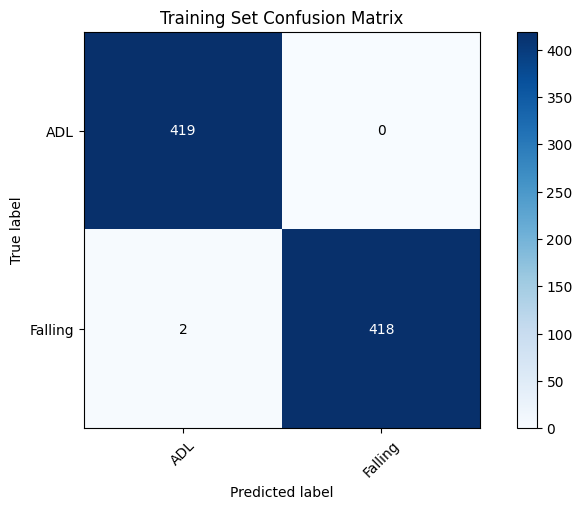

In [39]:
# Plotting
plt.figure(figsize=(15, 5))
label_names = ['ADL', 'Falling']
plt.subplot(1, 2, 1)
plot_confusion_matrix(y_train, y_train_pred, label_names, title='Training Set Confusion Matrix')

4. Dump model

In [41]:
with open('./decision-tree-rf-model', 'wb') as file:
    pickle.dump(best_model, file)